In [1]:
import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv

from plotly.offline import init_notebook_mode

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os


import pandas as pd
import numpy as np
import time
import seaborn as sn

init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
from skimage.morphology import reconstruction
from sklearn.preprocessing import QuantileTransformer

def CRV(X, band_no, w, h, numComponents):

  X_mean = X
  X_mean['mean'] = X_mean.mean(axis=1)
  Avr = [X_mean['mean']]
  rep_Avr = np.repeat(Avr, band_no)
  rep_Avr =np.reshape(rep_Avr, (-1,band_no))
  main_X = X.iloc[:, :-1]
  print(main_X.shape, rep_Avr.shape)
  seed = main_X - rep_Avr
  dilated = reconstruction(seed.values, main_X.values)
  hdome = main_X - dilated


  hdome_raw_mean = hdome
  hdome_raw_mean = hdome_raw_mean.append(hdome_raw_mean.agg(['mean'], axis=0))
  sort_hdome_raw_mean = hdome_raw_mean.sort_values(by='mean', axis=1, ascending=False)
  Top_columns = sort_hdome_raw_mean[sort_hdome_raw_mean.columns[0:numComponents]]
  columns_Names = Top_columns.columns

  print(columns_Names)

  input_data = df[columns_Names]

  scaler = QuantileTransformer(n_quantiles=15, random_state=0,output_distribution='normal') #
  scaler = scaler.fit_transform(input_data)
  #scaler = np.reshape(scaler, numComponents)
  print(scaler.shape)

  return scaler

In [3]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  #q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = X)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[1])]+['class']

  return df

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('aa.csv')
Xx = dataset.iloc[:, 1:15].values
yy = dataset.iloc[:, 15].values

In [20]:
band_no = Xx.shape[1]
h = Xx.shape[1]
w = Xx.shape[0]
K = 4  # The target number of bands
Xx.shape, yy.shape, h, w, band_no

((158, 14), (158,), 14, 158, 14)

In [21]:
df = extract_pixels(Xx, yy)
X = df.iloc[:, :-1]

In [22]:
X.shape

(158, 14)

In [23]:
CRV_X = CRV(X, band_no, w, h, numComponents= K)
X = CRV_X
X.shape

(158, 14) (158, 14)
Index(['band10', 'band8', 'band9', 'band7'], dtype='object')
(158, 4)


(158, 4)

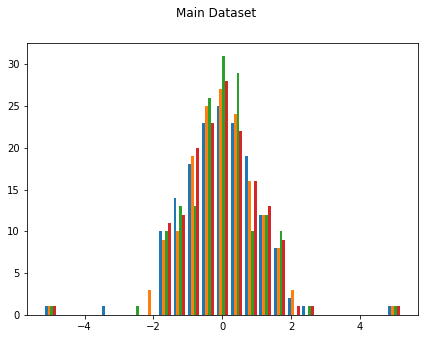

In [24]:
from matplotlib import pyplot
pyplot.figure(figsize=(7,5))
pyplot.hist(X[:,:], bins=25)
pyplot.suptitle("Main Dataset")
pyplot.show()


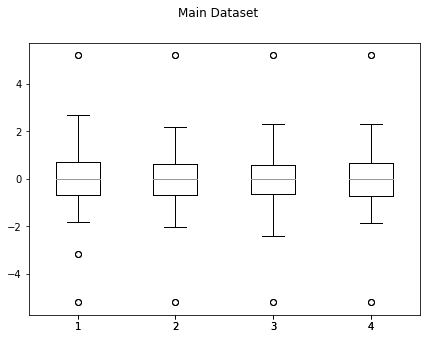

array([-3.15029953, -5.19933758,  5.19933758])

In [25]:
pyplot.figure(figsize=(7,5))
c = pyplot.boxplot(X[:,:])
top_points = c["fliers"][0].get_data()[1]
pyplot.boxplot(X[:,:])
pyplot.suptitle("Main Dataset")
pyplot.show()
top_points